# French Polynesia

As i am currently traveling through the islands of french Polynesia there is no better topic for me for my mini challenge. While French Polynesia is a perfect paradise, my photography skills are less  than perfect and my pictures can do with some image editing. Let's start with the usual libraries:

In [ ]:
import numpy as np
import pandas as pd
import cv2 as cv
import librosa
import matplotlib.pyplot as plt

For the image selection we'll start with a traditional view we encounter often in polynesia: tropical plants in front of a towering mountain range. Many of Polynesias islands are volcanic and thus have many sharp peaks. The challenge for this image is to balance the lighting between the foreground and background - the mountains are very dark and details are not well visible because of that. 

#### Problem
The lighting in the image is uneaven, which results in the background not being well visible. 
Experiment 1: 
- What: Use histogram equalisation to even out the light
- How: 
- Why:
Experiment 2: 
- What:
- How:
- Why:

In [ ]:
def plot_img_with_hist(img, cmap='gray', bins=255, xlim_min=0, xlim_max=255):
    fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12,4))
    axs[0].imshow(img, cmap=cmap)
    axs[0].axis('off')
    axs[0].set_title("Image")
    axs[1].hist(img.flatten(), bins=bins)
    axs[1].set_xlim(xlim_min,xlim_max)
    axs[1].set_title("Histogram")
    plt.tight_layout()
    plt.show()

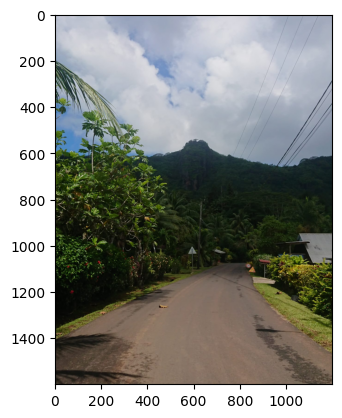

In [50]:
huahine = cv.imread('images/huahine.jpg')
huahine = cv.cvtColor(huahine, cv.COLOR_BGR2RGB)

plt.imshow(huahine)
plt.show()

In [ ]:
plot_img_with_hist(huahine)

The next image is from an ancient mara'e on Huahine. Mara'e were places of social gatherings or worship in the old world, before the missionaries arrived and built their churches atop of them. This image contains an engraving of a turtle. As it's hard to see, this image can be used to test out methods to enhance the pattern, such as hightened contrast or denoising. 

In [ ]:
def linear_hist_equ(image:np.array) -> np.array:
    res = np.zeros((image.shape[0], image.shape[1]))
    H = np.histogram(image, bins=256)[0]

    # Compute cumulative histogram
    H = np.cumsum(H)
    
    # Equalize the image
    for v in range(image.shape[1]):
        for u in range(image.shape[0]):
            a: int = int(image[u, v])
            b: int = H[a] * 255 / (image.shape[0] * image.shape[1])
            res[u, v] = b
    return res

In [ ]:
def rgb_to_grayscale(image: np.ndarray, wr: int = 0.2126, wg: int = 0.7152, wb: int = 0.0722) -> np.ndarray:
    ### BEGIN SOLUTION
    grey_image = image[:,:,0]*wr +image[:,:,1]*wg +image[:,:,2]*wb
    grayscale_image = image[:,:,0] * wr + image[:,:,1] * wg + image[:,:,2] * wb



    return grayscale_image

In [ ]:
huahine_grey = rgb_to_grayscale(huahine)
equalized = linear_hist_equ(huahine_grey)
plot_img_with_hist(equalized)


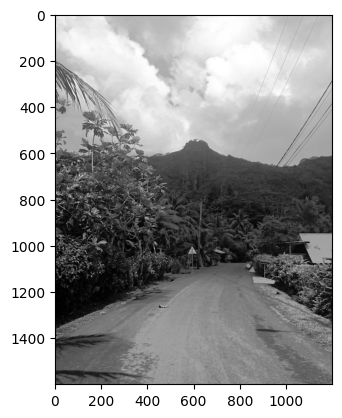

In [61]:
# Load image
image2 = cv.imread('images/huahine.jpg')

gray_image2 = cv.cvtColor(image2, cv.COLOR_RGB2GRAY)

# Apply histogram equalization
equalized_image = cv.equalizeHist(gray_image2)
plt.imshow(equalized_image, cmap = 'gray')

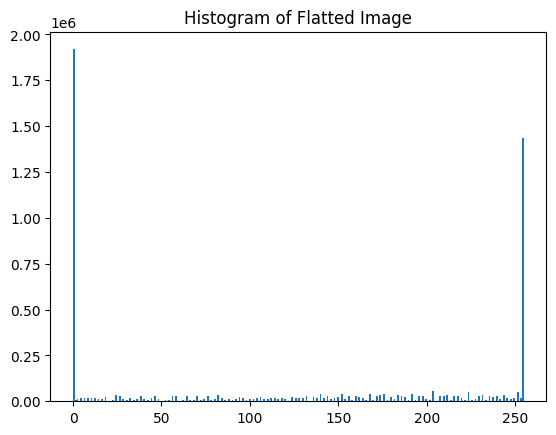

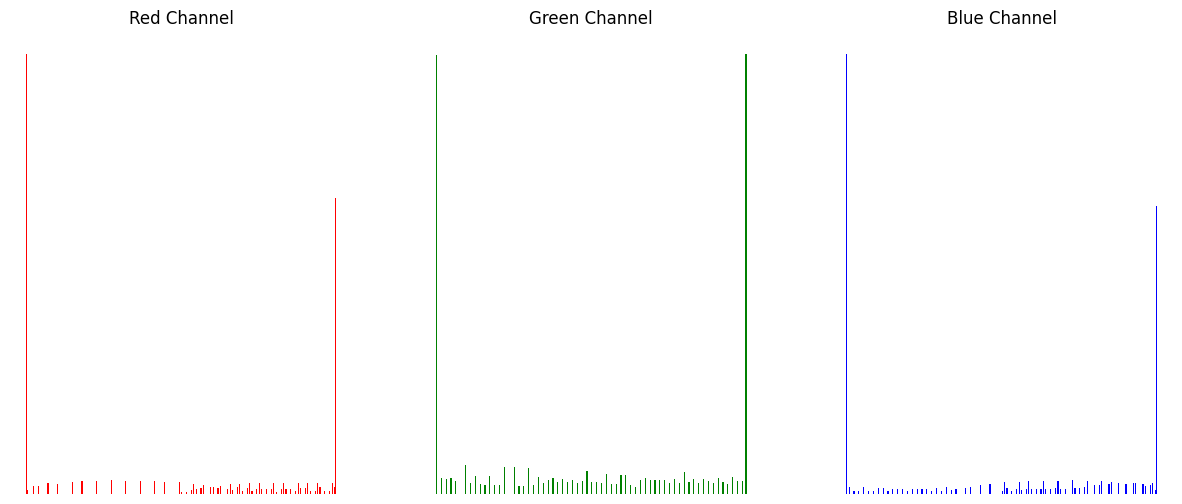

In [83]:
red_channel_image = color_mapped_image[:,:,0]
green_channel_image = color_mapped_image[:,:,1]
blue_channel_image = color_mapped_image[:,:,2]

plt.hist(color_mapped_image.flatten(), bins=256)
plt.title("Histogram of Flatted Image")
plt.show()

fig, rows = plt.subplots(nrows=1, ncols=3, figsize=(15,6))
rows[0].hist(red_channel_image.flatten(), bins=256, color='red')
rows[0].axis('off')
rows[0].set_title('Red Channel')
rows[1].hist(green_channel_image.flatten(), bins=256, color='green')
rows[1].axis('off')
rows[1].set_title('Green Channel')
rows[2].hist(blue_channel_image.flatten(), bins=256, color='blue')
rows[2].axis('off')  
rows[2].set_title('Blue Channel')
plt.show()

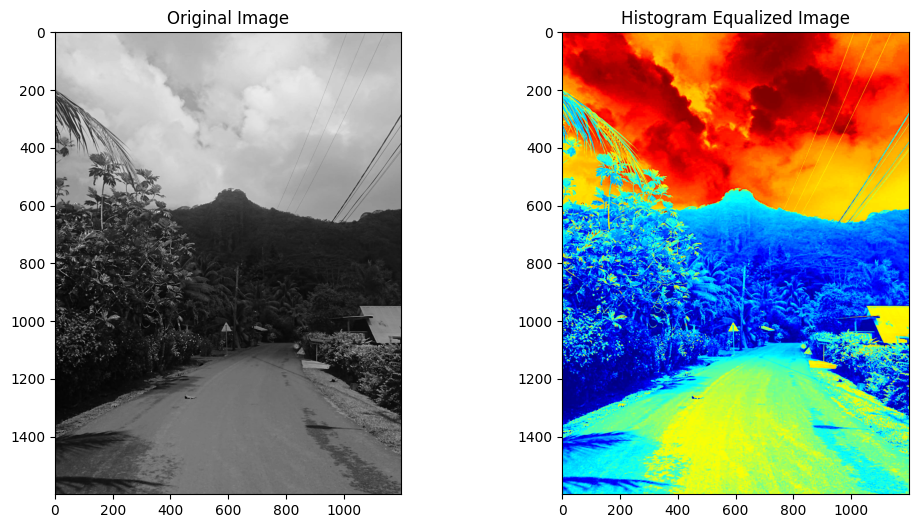

In [82]:


# Convert back to BGR
equalized_bgr = cv.cvtColor(equalized_image, cv.COLOR_GRAY2RGB)
color_mapped_image = cv.applyColorMap(equalized_bgr, cv.COLORMAP_JET)


# Display images
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(gray_image2, cmap = 'gray')
plt.title('Original Image')
plt.subplot(1, 2, 2)
plt.imshow(cv.cvtColor(color_mapped_image, cv.COLOR_BGR2RGB))
#plt.imshow(cv.cvtColor(equalized_bgr, cv.COLOR_BGR2RGB), cmap = 'RdYlBu')
plt.title('Histogram Equalized Image')
plt.show()

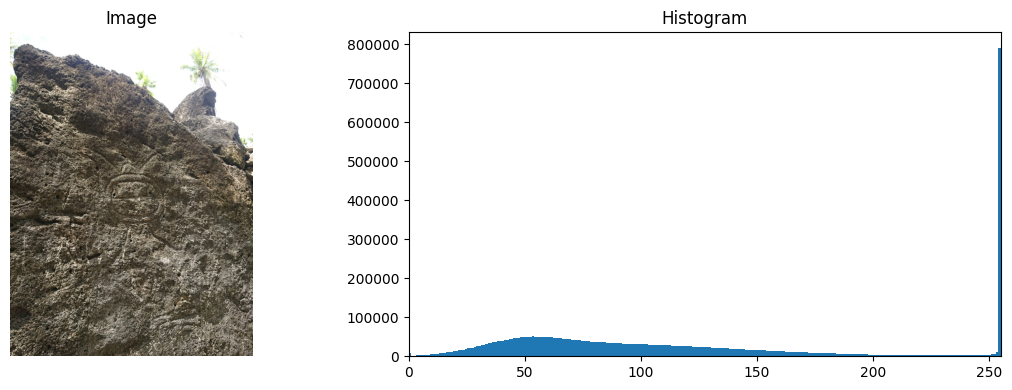

NameError: name 'mse' is not defined

In [86]:
marae = cv.imread('images/marae.jpg')
marae = cv.cvtColor(marae, cv.COLOR_BGR2RGB)

plot_img_with_hist(marae)
ssim_gauss = np.round(ssim(marae, img_res, channel_axis=2), 2)
psnr_gauss = np.round(peak_signal_noise_ratio(marae, img_res), 2)
print(f'mse: {mse_gauss} \n ssim: {ssim_gauss} \n psnr: {psnr_gauss}')

### Problem

Experiment: Kontrast mittels RMS-Kontrast und Histogrammegalisation zu verstärken. 
- What
- How
- why

Experiment 2: Linien sichtbarer machen indem der Wertebereich angepasst wird. 

Eine pragmatische Variante den Kontrast zu verbessern, ist es den Wertebereich aufs Minimum und Maximum zu strecken. Dem sagt man Histogrammegalisation (Englisch: histogram equalization). 

the last image is of some traditional crafting. Women will wear these beautiful flower crowns for special events, such as weddings. We also see a small handbag woven from palm leaves. Weaving palm leaves into various items is something even small children learn here. The versatility of this naturally occuring material is great: it can be turned into plates, hats, bags or even panels for your hut or roof. For the challenge this image can be used to explore color spaces and see how it best translates to greyscale. Additionally, the lighting has changed some of the colors of the flowers, making them appear oversaturated. I will try to correct this. 

In [ ]:
flowers = cv.imread('images/flowers.jpg')
flowers = cv.cvtColor(flowers, cv.COLOR_BGR2RGB)

plot_img_with_hist(flowers)

In [85]:
from enum import IntEnum
from ipywidgets import interact, widgets, HBox
from matplotlib import pyplot as plt
from skimage.metrics import peak_signal_noise_ratio
from skimage.metrics import structural_similarity as ssim
from skimage.metrics import peak_sig

Sources:
https://en.wikipedia.org/wiki/Marae


In [87]:
from sklearn.metrics import root_mean_squared_error

root_mean_squared_error([50,50,150,255], [150,150,255,255])

np.float64(88.06957476904269)